In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [2]:

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y=mnist['data'], mnist['target']

In [4]:
# There are 70,000 images with 784 features. [Each image is 28*28 pixels] [ Each pixel tells about the number that a pixel can represent i.e 0 to 255]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

## Data Exploration


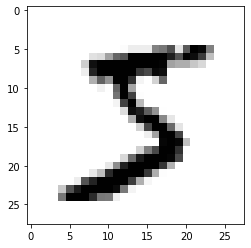

In [6]:
# to view an image we need to reshape x[28,28]

X[0].shape

# This shape has to be converted to a 28*28 matrix to view the actual digit
import matplotlib.pyplot as plt

first_digit=X[0]

first_digit_image = first_digit.reshape(28,28)
# This function helps us see an image when the shape of the input is 28*28
plt.imshow(first_digit_image, cmap='binary')

In [7]:
# Checking out the actual label
y[0]

'5'

In [8]:
# The label is mentioned as a string so we shall convert it into an integer

import numpy as np

y=y.astype(int)

In [9]:
# We have converted the string values into integers
y

array([5, 0, 4, ..., 4, 5, 6])

## Splitting into train and test

In [10]:
# We shall be now splitting the data into a test data set and a train data set

X_train,X_test, y_train, y_test= X[:60000], X[60000:],y[:60000], y[60000:]

## Creating a Binary Classifier

In [11]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [12]:
# We shall use the SGDClassifier as we have >100000 fields and we have labelled data (check Scikit Learn Model selection map below to choose an appropriate model)

# To note is that SGD Classfier comes as a linear model 
from sklearn.linear_model import SGDClassifier 

#SGD classifier introduces randomness during training that's why it is best to write a random_state number for reproducibility

# Initializing the model
sgd_clf=SGDClassifier(random_state=42)

# Fitting the model
sgd_clf.fit(X_train,y_train_5)

# Predictions made
sgd_clf.predict([first_digit])

array([ True])

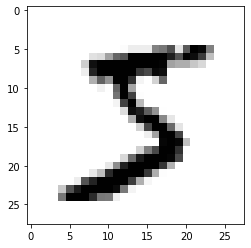

In [13]:
plt.imshow(first_digit_image, cmap='binary')

We can observe that our "5 or not" predictor has predicted our output correctly

## Evaluating our ('is it 5 or not' classfier)

In [14]:
# Using the k-fold Cross Validation to check how the model works on the data

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3, scoring='accuracy')


# The values suggest that our model on an average is 95% accurate in its predictions of True or False

array([0.95035, 0.96035, 0.9604 ])

In [15]:
# Using the confusion matrix as a metric for classification.

from sklearn.model_selection import cross_val_predict

# Cross_val_predict performs the K-fold cross -validation but it returns the predictions instead of the cross-val scores as above

y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)



In [16]:
# Now implementing the confusion matrix on the y_train_preds 

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [17]:
# Getting the precision and recall of the matrix

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [18]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [19]:
# When we want to get decision scores instead of predictions with cross_val_predict

y_scores = cross_val_predict(sgd_clf,X_train, y_train_5, cv=3, method='decision_function' )

In [20]:
from sklearn.metrics import roc_curve 

# ROC curve function that is imported from metrics does not need the train and test set

# Instead it needs the train_labels and the training decision function scores
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

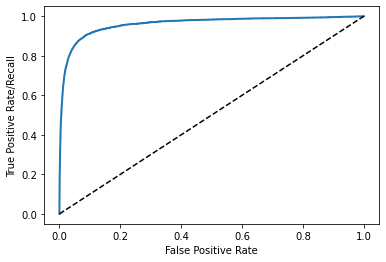

In [21]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate/Recall')
        
plot_roc_curve(fpr,tpr)
plt.show()

# We realize that with higher Precision also comes Higher Recall

In [22]:
# Area under the curve is one way of measuring and comparing multiple classifiers
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [23]:
# Comparign the ROC_AUC for the sgd_clf used and a RandomFOrestClassifier

from sklearn.ensemble import RandomForestClassifier

forest_clf= RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train, y_train_5, cv=3, method='predict_proba')

y_scores_forest= y_probas_forest[:,1]

fpr_forest, tpr_forest, thresholds_forest=roc_curve(y_train_5, y_scores_forest)

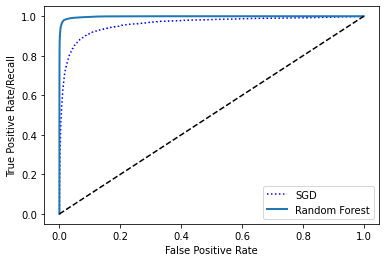

In [24]:
# We can see that the Random FOrest has a greater AUC than SGD hence, it is the better classfier with the given data
plt.plot(fpr,tpr,'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc='lower right')
plt.show()